In [4]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("kc_house_data.csv")
data.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


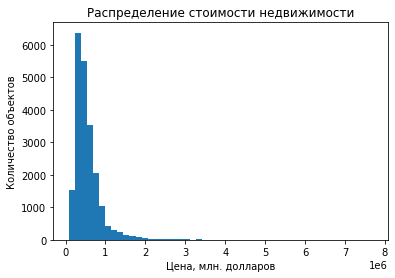

In [8]:
import matplotlib.pyplot as plt

# Гистограмма стоимости недвижимости
plt.hist(data['price'], bins=50)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена, млн. долларов')
plt.ylabel('Количество объектов')
plt.show()


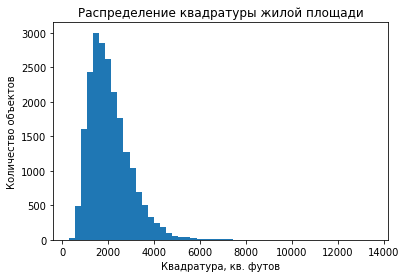

In [9]:
# Гистограмма квадратуры жилой площади
plt.hist(data['sqft_living'], bins=50)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура, кв. футов')
plt.ylabel('Количество объектов')
plt.show()


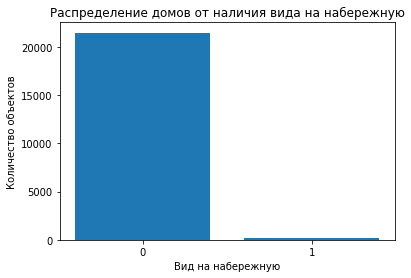

In [10]:
# Столбчатая диаграмма распределения домов от наличия вида на набережную
waterfront_counts = data['waterfront'].value_counts()
plt.bar(waterfront_counts.index.astype(str), waterfront_counts.values)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Количество объектов')
plt.show()



In [11]:
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")
print(df.head())
print(df.info())
print(df.describe())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


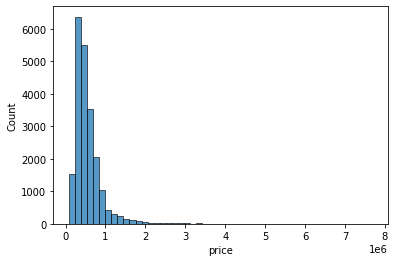

In [12]:
# Основные статистики
print(data['price'].describe())

# Гистограмма распределения стоимости
sns.histplot(data=data, x='price', bins=50)
plt.show()


count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


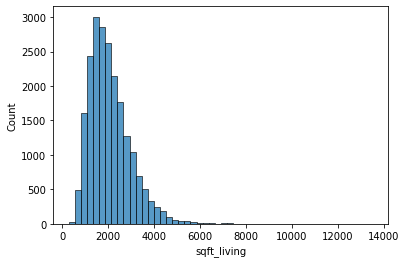

In [13]:
# Основные статистики
print(data['sqft_living'].describe())

# Гистограмма распределения квадратуры жилой
sns.histplot(data=data, x='sqft_living', bins=50)
plt.show()


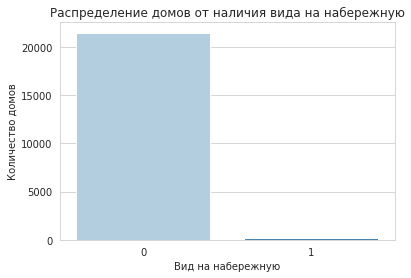

In [14]:


sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(x='waterfront', data=data, palette='Blues')
plt.title('Распределение домов от наличия вида на набережную', fontsize=12)
plt.xlabel('Вид на набережную', fontsize=10)
plt.ylabel('Количество домов', fontsize=10)

plt.show()


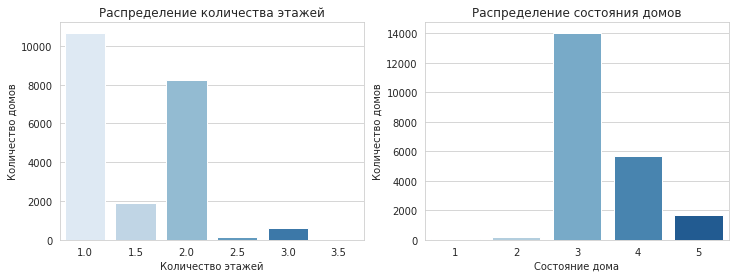

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='floors', data=data, palette='Blues', ax=axes[0])
axes[0].set_title('Распределение количества этажей', fontsize=12)
axes[0].set_xlabel('Количество этажей', fontsize=10)
axes[0].set_ylabel('Количество домов', fontsize=10)

sns.countplot(x='condition', data=data, palette='Blues', ax=axes[1])
axes[1].set_title('Распределение состояния домов', fontsize=12)
axes[1].set_xlabel('Состояние дома', fontsize=10)
axes[1].set_ylabel('Количество домов', fontsize=10)

plt.show()


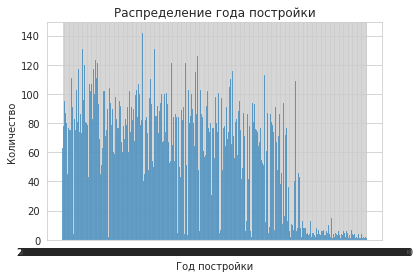

In [17]:
# Создадим график распределения года постройки
sns.histplot(df['date'], kde=False)

# Добавим подписи осей и заголовок
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение года постройки')

# Покажем график
plt.show()


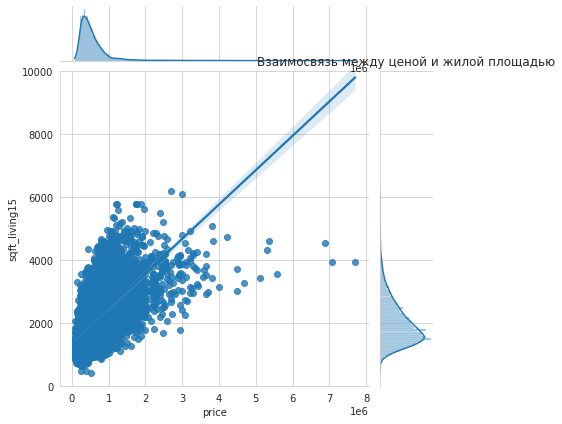

In [24]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

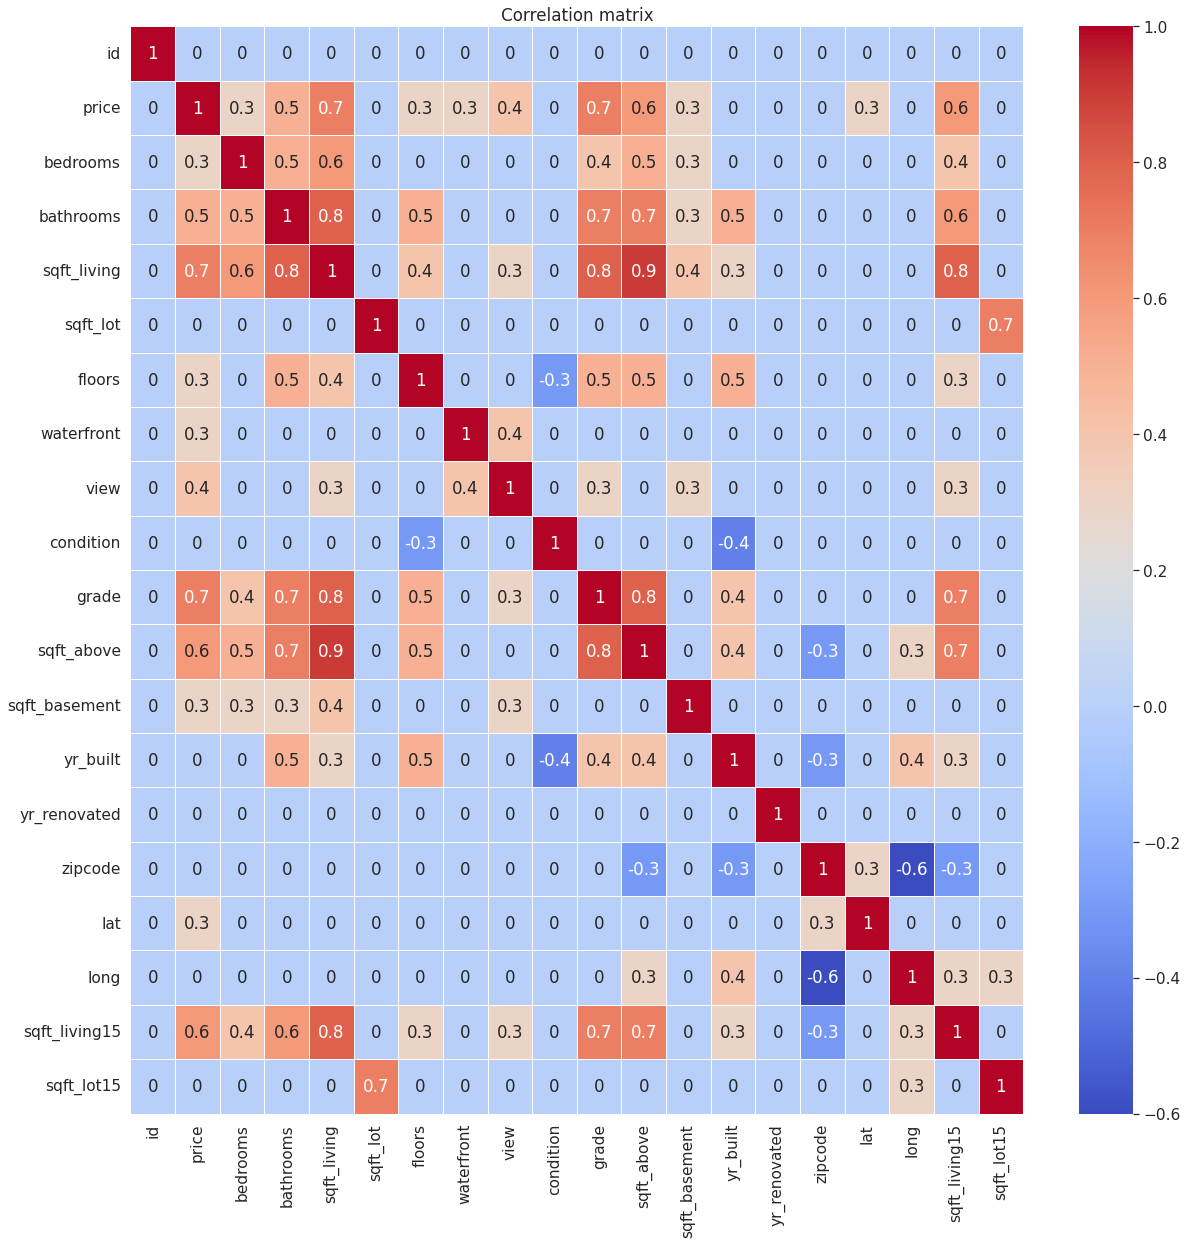

In [25]:
import numpy as np

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

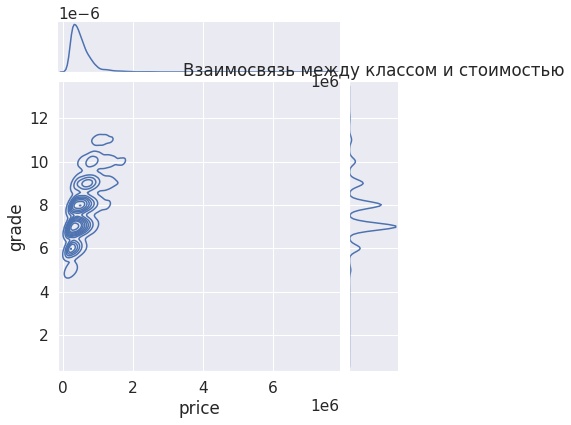

<AxesSubplot:xlabel='price'>

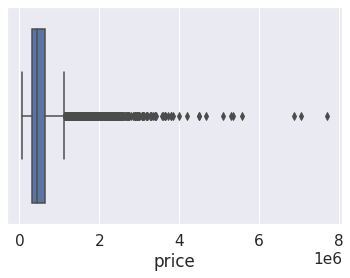

In [27]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde')
plt.title('Взаимосвязь между классом и стоимостью')
plt.xlabel('Класс')
plt.ylabel('Оценка')
plt.show()
sns.boxplot(x=df['price'], whis=1.5)